In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import ast
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import numpy as np



In [50]:
county_2016 = pd.read_csv('2016_registration.csv')
county_2020 = pd.read_csv('2020_registration.csv')
district_2016 = pd.read_csv('district_demo_2016.csv')
district_2020 = pd.read_csv('district_demo_2020.csv')
district_2020

,District,district_pop,n_reg_voters,female,male,white,black,american_indian/alaska_native,native_hawaiian/pacific_islander,hispanic,...,other_race_percent_of_pop,democrat_percent_of_pop,republican_percent_of_pop,unaffiliated_percent_of_pop,green_percent_of_pop,libertarian_percent_of_pop,constitution_percent_of_pop,justice_for_all_percent_of_pop,no_labels_percent_of_pop,we_the_people_percent_of_pop
0,1.0,733498,491721.0,254213.0,206173.0,231383.0,207465.0,2727.0,10.0,9438.0,...,0.068351,0.343747,0.155450,0.167834,0.000221,0.002755,0.000374,0.0,0.0,0.0
1,2.0,733499,646799.0,307578.0,268634.0,391624.0,117602.0,1540.0,22.0,23587.0,...,0.185428,0.323545,0.209608,0.340787,0.000469,0.006886,0.000504,0.0,0.0,0.0
2,3.0,733499,513402.0,257277.0,219164.0,349699.0,102902.0,1119.0,39.0,13149.0,...,0.081313,0.216769,0.241726,0.235583,0.000333,0.004993,0.000530,0.0,0.0,0.0
3,4.0,733499,631778.0,305447.0,254979.0,357848.0,145546.0,1513.0,33.0,22501.0,...,0.172923,0.394100,0.153276,0.307936,0.000468,0.005164,0.000375,0.0,0.0,0.0
4,5.0,733499,514322.0,253354.0,222047.0,403379.0,51897.0,840.0,7.0,10256.0,...,0.079344,0.183901,0.288443,0.223715,0.000320,0.004297,0.000513,0.0,0.0,0.0
5,6.0,733498,573832.0,293869.0,236800.0,309472.0,176885.0,1385.0,19.0,19009.0,...,0.117343,0.331702,0.201544,0.243623,0.000429,0.004600,0.000424,0.0,0.0,0.0
6,7.0,733499,611479.0,300993.0,258717.0,432801.0,94242.0,3331.0,33.0,16278.0,...,0.110528,0.252640,0.293136,0.281454,0.000367,0.005475,0.000575,0.0,0.0,0.0
7,8.0,733498,545001.0,266796.0,222596.0,302991.0,143289.0,3432.0,70.0,24888.0,...,0.129816,0.260981,0.231588,0.244212,0.000333,0.005275,0.000627,0.0,0.0,0.0
8,9.0,733499,553098.0,277698.0,235532.0,306322.0,131629.0,32027.0,40.0,19994.0,...,0.113265,0.289522,0.213011,0.246293,0.000337,0.004346,0.000545,0.0,0.0,0.0
9,10.0,733499,537100.0,266082.0,233779.0,407139.0,61322.0,826.0,10.0,15086.0,...,0.092438,0.185294,0.306433,0.235819,0.000273,0.003941,0.000484,0.0,0.0,0.0


# Identifying Cracking and Packing Analysis

In [218]:
# list of demo groups to make proportion columns
demo_groups = county_2016.columns[2:19].tolist()
# adding column for percentage of each demographic over total registered voters 

def add_proportions(df):
    for col in demo_groups:
        df[f'{col}_percent'] = df[col] / df['total']
    

add_proportions(county_2016)
add_proportions(county_2020)

Proportion of Black to White Registered Voters in North Carolina in 2016 vs 2020 

In [101]:
def add_ratios(df):
    # calculate ratio of black to white registered voters
    df["black_white_ratio"] = df['black'] / df['white']
    # calculate ratio of democrat to republican registered voters 
    df["dem_rep_ratio"] = df["democrat"] / df['republican']

add_ratios(district_2016)
add_ratios(district_2020)

<Axes: >

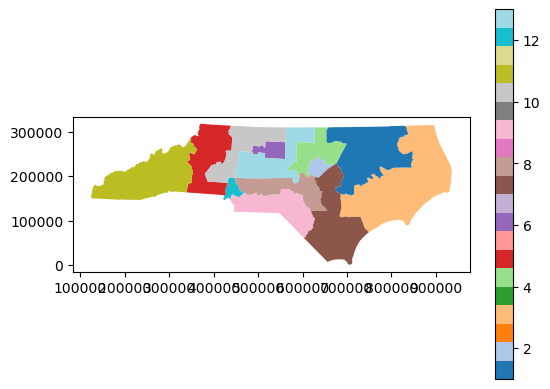

In [56]:
# reading shape file 
shp_2020 = gpd.read_file("2020_shp/C-Goodwin-A-1-TC.shp")
# changing column type and name for better merging 
shp_2020['DISTRICT'] = shp_2020['DISTRICT'].astype(float)
shp_2020 = shp_2020.rename(columns={"DISTRICT": "District"})  # Replace with actual column name
shp_2020.plot(column='District', cmap='tab20', legend=True)

<Axes: >

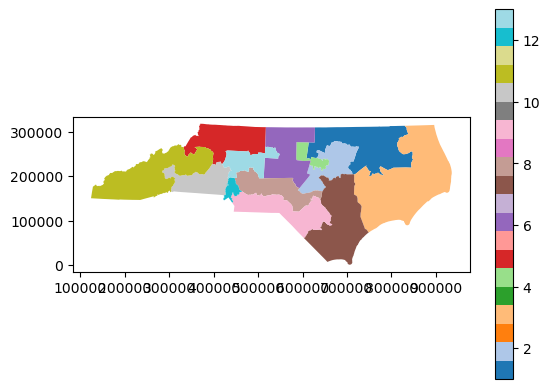

In [48]:
shp_2016 = gpd.read_file("2016_shp/2016_Contingent_Congressional_Plan_Corrected.shp")
shp_2016.plot(column='District', cmap='tab20', legend=True)

In [83]:
# merging with props

map2020 = shp_2020.merge(district_2020, on = "District")
map2016 = shp_2016.merge(district_2016, on = "District")
# centroids are calculated so that districts can be labeled 
map2020['centroid'] = map2020.geometry.centroid
map2016['centroid'] = map2016.geometry.centroid


In [349]:
district_2016['black_white_ratio']

0     0.893838
1     0.353595
2     0.318072
3     0.284175
4     0.195093
5     0.296660
6     0.265882
7     0.385808
8     0.480723
9     0.141788
10    0.037629
11    0.586329
12    0.308666
Name: black_white_ratio, dtype: float64

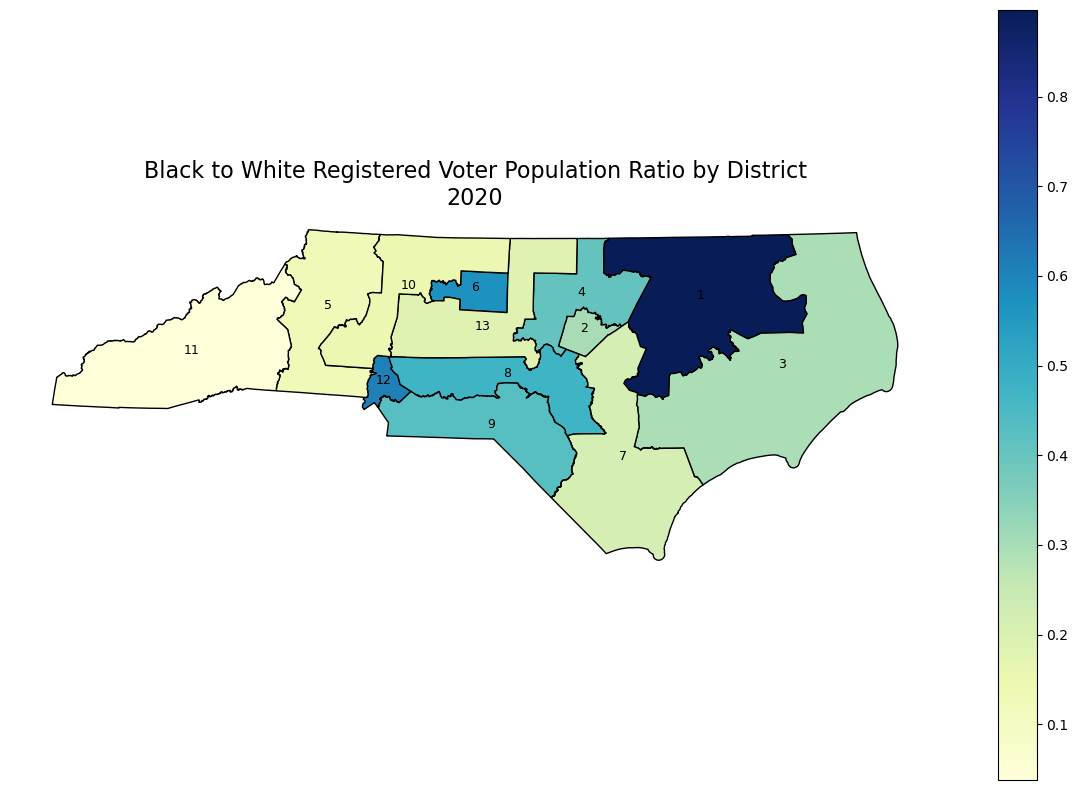

In [348]:
map2020.plot(column='black_white_ratio', cmap='YlGnBu', legend=True,figsize=(15, 10), edgecolor='black')
# plotting labels 
for x, y, label in zip(map2020['centroid'].x, map2020['centroid'].y, map2020['District']):
    # needed to specially shift district 13 label down 
    if label == 13.0:
        y = y - 18000
    elif label == 8:
        y = y + 5000
    plt.text(x, y, str(int(label)), fontsize=9, ha='center', color='black')
plt.axis("off")
plt.title("Black to White Registered Voter Population Ratio by District\n2020", fontsize=16)
plt.savefig("2020_black_white_ratio.png")


In [354]:
district_2020['black_white_ratio']

0     0.896630
1     0.300293
2     0.294259
3     0.406726
4     0.128656
5     0.571570
6     0.217749
7     0.472915
8     0.429708
9     0.150617
10    0.037845
11    0.609650
12    0.187340
Name: black_white_ratio, dtype: float64

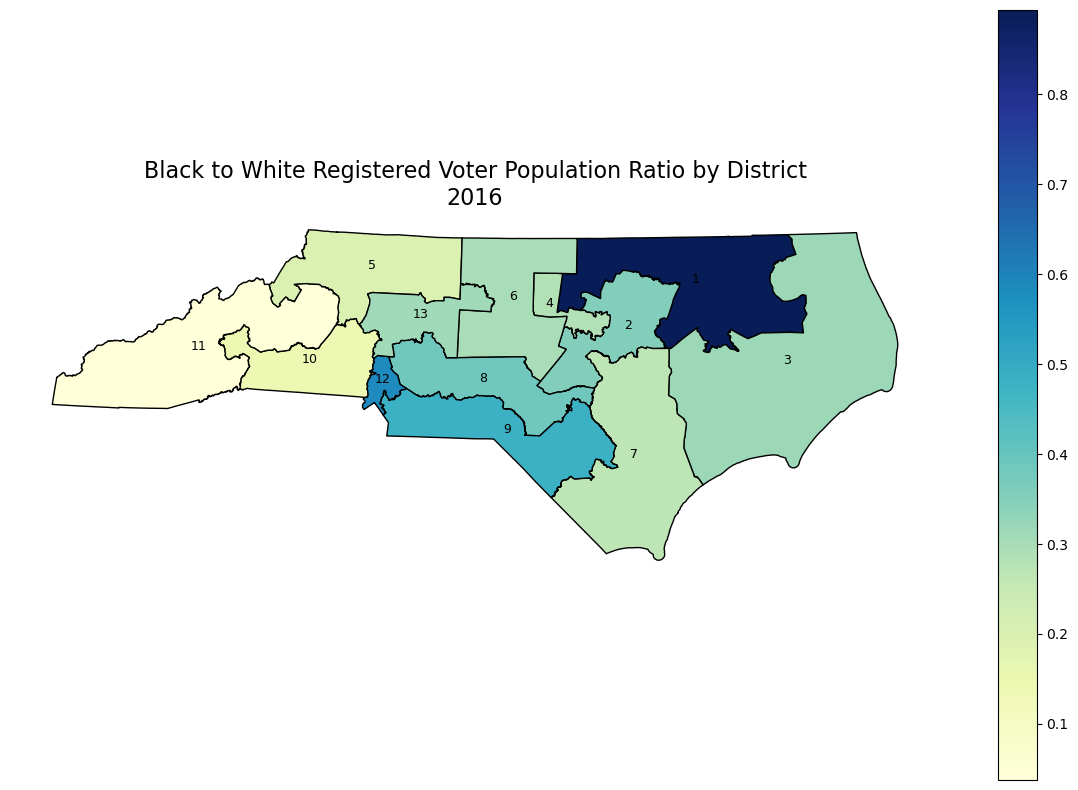

In [347]:
map2016.plot(column='black_white_ratio', cmap='YlGnBu', legend=True,figsize=(15, 10), edgecolor='black')
for x, y, label in zip(map2016['centroid'].x, map2016['centroid'].y, map2016['District']):
    # need to specially shift district 4 label left 
    if label == 4:
        x = x - 15000
    elif label == 2:
        x = x + 15000
    plt.text(x, y, str(int(label)), fontsize=9, ha='center', color='black')
plt.axis("off")
plt.title("Black to White Registered Voter Population Ratio by District\n2016", fontsize=16)
plt.savefig("2016_blak_white_ratio.png")

In [425]:
map2016.dem_rep_ratio.max()

3.614450106300408

In [421]:
map2020.dem_rep_ratio.min()

0.6046812713553531

In [407]:
(county_2016['democrat']/county_2016['republican']).mean()

1.8444414093383663

Creating custom colormap

In [456]:

# making range for color scale
vmin_2020 = 0     
vcenter_2020 = (county_2020['democrat']/county_2020['republican']).mean()  
vmax_2020 = map2020.dem_rep_ratio.max()    

# normalizing so that the statewide average is at the center
norm_2020 = TwoSlopeNorm(vmin=vmin_2020, vcenter=vcenter_2020, vmax=vmax_2020)

In [475]:
district_2020.dem_rep_ratio

0     2.211310
1     1.543575
2     0.896755
3     2.571174
4     0.637562
5     1.645807
6     0.861851
7     1.126921
8     1.359190
9     0.604681
10    0.874861
11    2.001632
12    0.640081
Name: dem_rep_ratio, dtype: float64

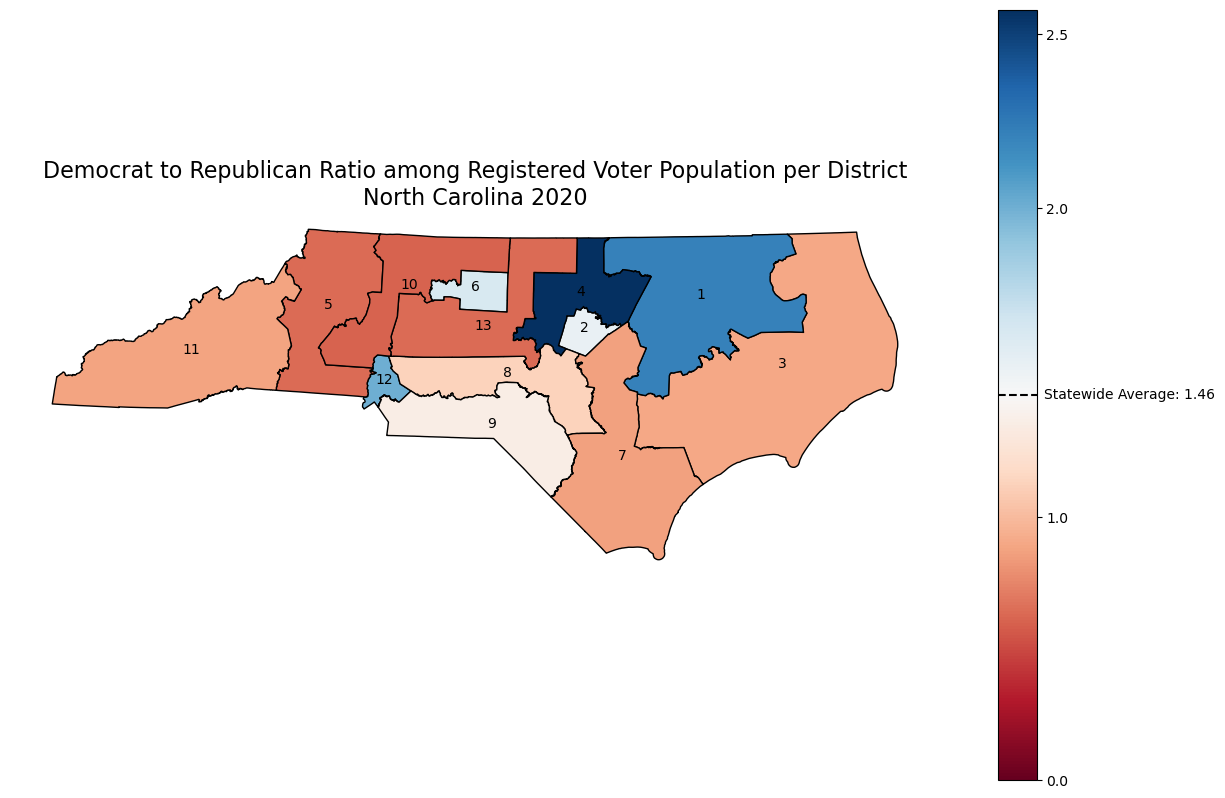

In [480]:
map2020.plot(column='dem_rep_ratio', legend=True,figsize=(15, 10), edgecolor='black', cmap="RdBu", norm=norm_2020)
for x, y, label in zip(map2020['centroid'].x, map2020['centroid'].y, map2020['District']):
    if label == 13.0:
        y = y - 18000

    elif label == 8:
        y = y + 5000
    plt.text(x, y, str(int(label)), fontsize=10, ha='center', color='black')
plt.axis("off")
plt.title("Democrat to Republican Ratio among Registered Voter Population per District\nNorth Carolina 2020", fontsize=16)
fig = plt.gcf()
cbar = fig.axes[-1]
cbar.axes.axhline(vcenter_2020, color='black', linestyle='--', linewidth=1.5)  # Horizontal line
cbar.axes.text(1.2, vcenter_2020, f"Statewide Average: {round(vcenter_2020, 2)}", va='center', ha='left', color='black')  
cbar.set_yticks([0, 1, 2, 2.5])
plt.savefig("2020_dem_rep_ratio.png")



In [458]:
cmap_2016 = plt.cm.RdBu  

vmin2016 = 0     
vcenter2016 = (county_2016['democrat']/county_2016['republican']).mean()
vmax2016= map2016.dem_rep_ratio.max()  

# Create normalization to ensure the midpoint is 1
norm_2016 = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

In [476]:
district_2016.dem_rep_ratio

0     3.614450
1     1.312091
2     1.197265
3     1.683098
4     0.911213
5     1.184768
6     1.137861
7     1.114567
8     1.724779
9     0.916142
10    0.922091
11    1.835568
12    0.986938
Name: dem_rep_ratio, dtype: float64

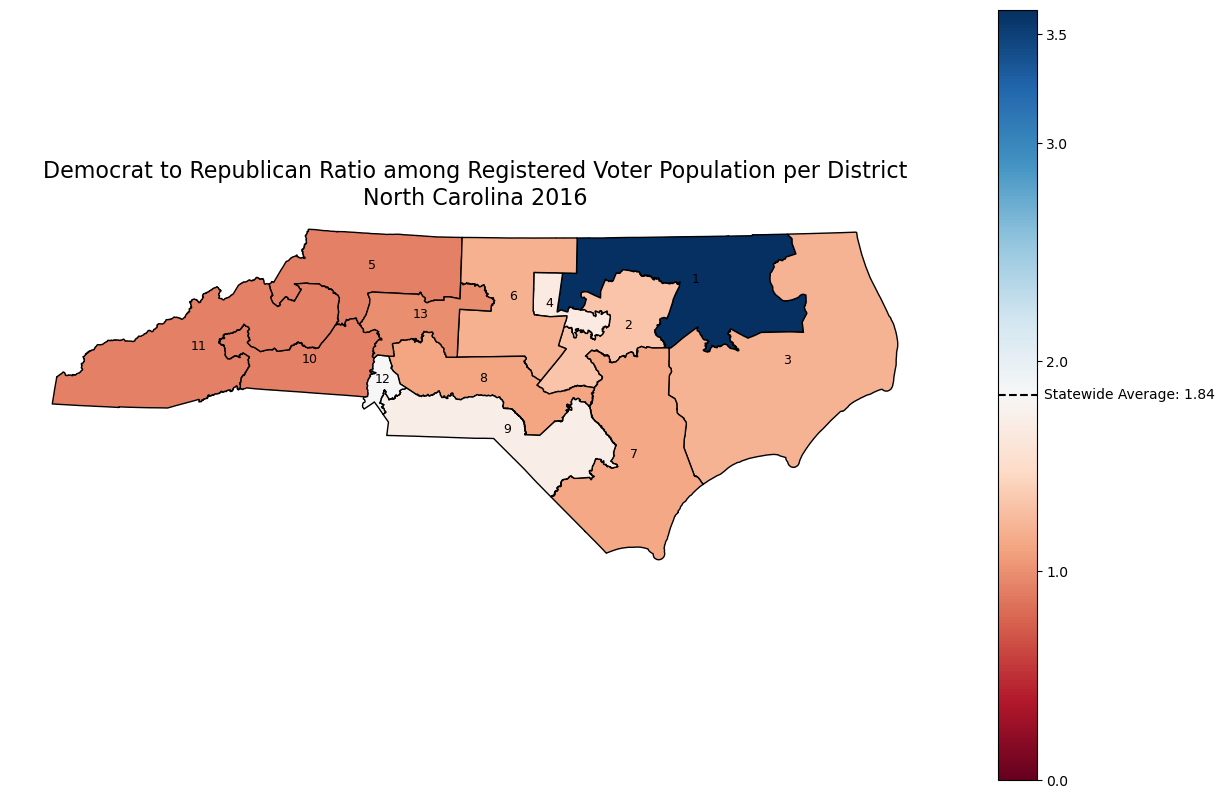

In [478]:
map2016.plot(column='dem_rep_ratio', legend=True,figsize=(15, 10), edgecolor='black', cmap=cmap_2016, norm=norm_2016)
for x, y, label in zip(map2016['centroid'].x, map2016['centroid'].y, map2016['District']):
    if label == 4:
        x = x - 15000
    elif label == 2:
        x = x + 15000
    plt.text(x, y, str(int(label)), fontsize=9, ha='center', color='black')
plt.axis("off")
plt.title("Democrat to Republican Ratio among Registered Voter Population per District\nNorth Carolina 2016", fontsize=16)
fig = plt.gcf()
cbar = fig.axes[-1]
cbar.axes.axhline(vcenter2016, color='black', linestyle='--', linewidth=1.5) 
cbar.axes.text(1.2, vcenter2016, f"Statewide Average: {round(vcenter2016, 2)}", va='center', ha='left', color='black')  
cbar.set_yticks([0, 1, 2, 3, 3.5])
plt.savefig("2016_dem_rep_ratio.png")

# Further Analyzing Cracking 

In [148]:
# list of counties 
counties = county_2016['index'].tolist()

In [277]:
# dataframes of district assignments to counties
nc_district_2016 = pd.read_csv("nc_pop_2016.csv")
nc_district_2016["Count"] = 1
nc_district_2016["County"] = nc_district_2016["County"].str.upper()

nc_district_2020 = pd.read_csv("nc_district_2020.csv")
nc_district_2020["Count"] = 1
nc_district_2020["County"] = nc_district_2020["County"].str.upper()


In [278]:
district_count_2020 = nc_district_2020.groupby("County").sum().sort_values(by = "Count", ascending = False).Count
assign_2020 = nc_district_2020.groupby('County')['District'].apply(lambda x: x.unique()).reset_index().merge(district_count_2020, on = "County")
district_count_2016 = nc_district_2016.groupby("County").sum().sort_values(by = "Count", ascending = False).Count
assign_2016 = nc_district_2016.groupby('County')['District'].apply(lambda x: x.unique()).reset_index().merge(district_count_2016, on = "County")
assign_2016

,County,District,Count
0,ALAMANCE,[6.0],1
1,ALEXANDER,[5.0],1
2,ALLEGHANY,[5.0],1
3,ANSON,[9.0],1
4,ASHE,[5.0],1
...,...,...,...
95,WAYNE,[7.0],1
96,WILKES,[5.0],1
97,WILSON,"[1.0, 2.0]",2
98,YADKIN,[5.0],1


Looking at counties which got split into two districts.

In [279]:
split_counties_2016 = assign_2016[assign_2016["Count"] > 1]
split_counties_2020 = assign_2020[assign_2020["Count"] > 1]


In [280]:
split_counties_2020.loc[:,"County"]

17        CATAWBA
18        CHATHAM
33        FORSYTH
42        HARNETT
48        IREDELL
52            LEE
59    MECKLENBURG
62          MOORE
73           PITT
80     RUTHERFORD
90          VANCE
91           WAKE
Name: County, dtype: object

In [302]:
# adding columns for the black and democrat percentage of reg voters 
split_demo_2016 = split_counties_2016.merge(county_2016.loc[:,['index','black_percent', 'democrat_percent', 'total', 'black', 'democrat']], right_on = 'index', left_on = 'County')
split_demo_2020 = split_counties_2020.merge(county_2020.loc[:,['index','black_percent', 'democrat_percent', 'total', 'black', 'democrat']], right_on = 'index', left_on = 'County')

In [303]:
split_demo_2016

,County,District,Count,index,black_percent,democrat_percent,total,black,democrat
0,BLADEN,"[7.0, 9.0]",2,BLADEN,0.370787,0.593996,23086,8560,13713
1,BUNCOMBE,"[10.0, 11.0]",2,BUNCOMBE,0.057569,0.394395,198372,11420,78237
2,CATAWBA,"[5.0, 10.0]",2,CATAWBA,0.091348,0.262799,104677,9562,27509
3,CUMBERLAND,"[8.0, 9.0]",2,CUMBERLAND,0.411650,0.468193,212015,87276,99264
4,DURHAM,"[1.0, 4.0]",2,DURHAM,0.371986,0.557945,232428,86460,129682
5,GUILFORD,"[6.0, 13.0]",2,GUILFORD,0.347918,0.462829,365649,127216,169233
6,IREDELL,"[10.0, 13.0]",2,IREDELL,0.117833,0.264713,117565,13853,31121
7,JOHNSTON,"[2.0, 7.0]",2,JOHNSTON,0.161757,0.319366,122455,19808,39108
8,MECKLENBURG,"[9.0, 12.0]",2,MECKLENBURG,0.328978,0.445650,710643,233786,316698
9,PITT,"[1.0, 3.0]",2,PITT,0.347106,0.466867,122703,42591,57286


In [304]:
# looking at the means of demographic percentages in order 
def compare_means(df, county_demo):
    black_percent_mean = county_demo['black_percent'].mean()
    democrat_percent_mean = county_demo['democrat_percent'].mean()
    print(f"Black Percentage of Reg Voters: {black_percent_mean}")
    print(f"Democrat Percentage of Reg Voters: {democrat_percent_mean}")
    df['black_percent_mean_diff'] = df['black_percent'] - black_percent_mean
    df['democrat_percent_mean_diff'] = df['democrat_percent'] - democrat_percent_mean

print("2016")
compare_means(split_demo_2016, county_2016)
print(2020)
compare_means(split_demo_2020, county_2020)


2016
Black Percentage of Reg Voters: 0.21041163086718837
Democrat Percentage of Reg Voters: 0.40941134937727824
2020
Black Percentage of Reg Voters: 0.19620582244878945
Democrat Percentage of Reg Voters: 0.3522059180848658


In [305]:
# number of counties which were split into 2 districts which contained percentages of black voters greater than the county mean
print(sum(split_demo_2016['black_percent_mean_diff']>0))
print(sum(split_demo_2020['black_percent_mean_diff']>0))

7
5


Mean Difference from the percentage of black registered voters of each county which got split into 2 districts compared to the county average percentage of black registered voters.

In [306]:
split_demo_2016['black_percent_mean_diff'].mean()

0.051285056135684556

In [320]:
split_demo_2016['black_percent_mean_diff'].median()

0.11856649176259901

In [307]:
split_demo_2020['black_percent_mean_diff'].mean()

0.010666947507460021

In [321]:
split_demo_2020['black_percent_mean_diff'].median()

-0.009364485731091152

Graphing the number of black registered voters of split counties compared to the county mean.

Text(0.5, 0, 'County')

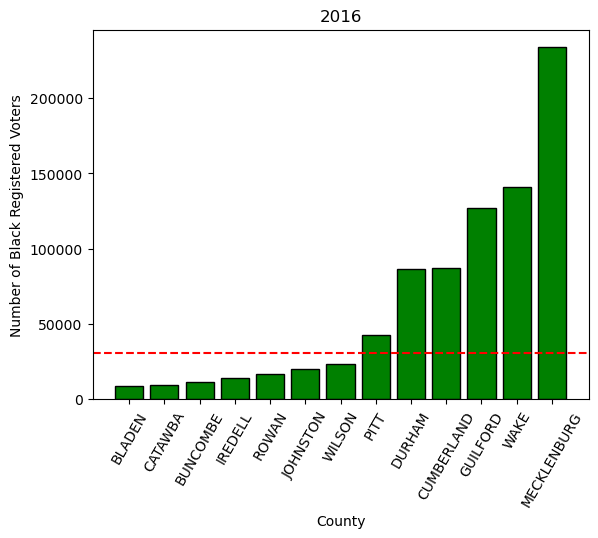

In [357]:
plt.bar(split_demo_2016.sort_values(by = 'black')['County'], split_demo_2016.sort_values(by = 'black')['black'], color='green', edgecolor='black')
plt.axhline(y=county_2016['black'].mean(), color='red', linestyle='--', linewidth=1.5, label='Threshold')
plt.xticks(rotation=60)
plt.title('2016')
plt.ylabel('Number of Black Registered Voters')
plt.xlabel('County')


Text(0.5, 0, 'County')

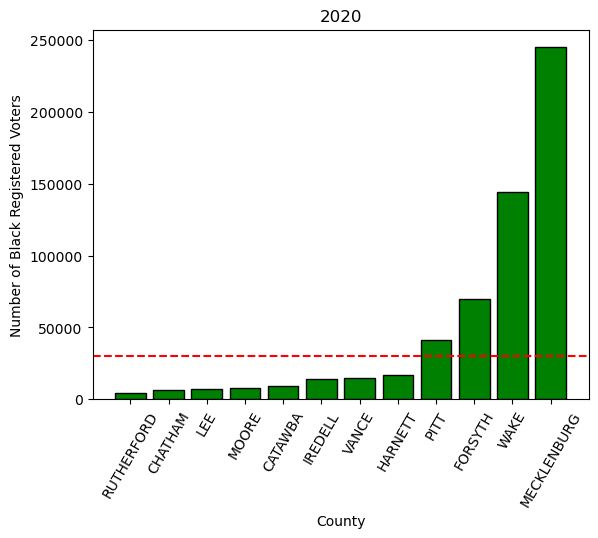

In [358]:
plt.bar(split_demo_2020.sort_values(by = 'black')['County'], split_demo_2020.sort_values(by = 'black')['black'], color='green', edgecolor='black')
plt.axhline(y=county_2020['black'].mean(), color='red', linestyle='--', linewidth=1.5, label='Threshold')
plt.xticks(rotation=60)
plt.title('2020')
plt.ylabel('Number of Black Registered Voters')
plt.xlabel('County')

Graphing the percentage of black voters of split counties compared to the statewide county average. 

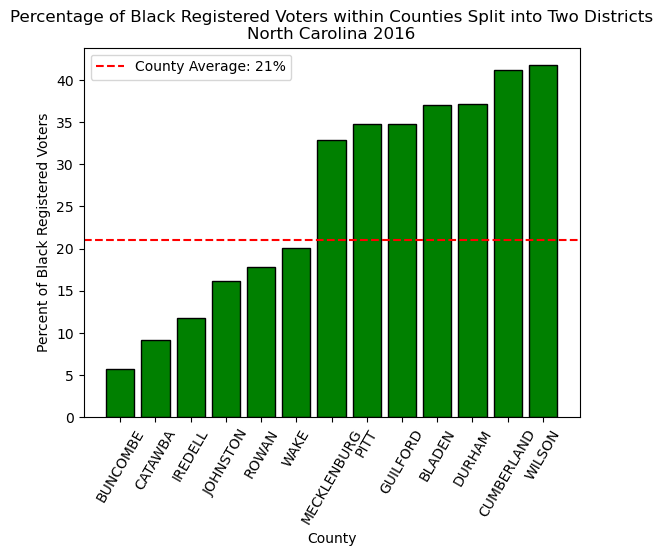

In [481]:
plt.bar(split_demo_2016.sort_values(by = 'black_percent')['County'], split_demo_2016.sort_values(by = 'black_percent')['black_percent']*100, color='green', edgecolor='black')
plt.axhline(y=county_2016['black_percent'].mean()*100, color='red', linestyle='--', linewidth=1.5, label='County Average: 21%')
plt.xticks(rotation=60)
plt.title('Percentage of Black Registered Voters within Counties Split into Two Districts\nNorth Carolina 2016')
plt.ylabel('Percent of Black Registered Voters')
plt.legend(loc='upper left')

plt.xlabel('County')
plt.savefig("2016_split_counties.png",bbox_inches='tight')

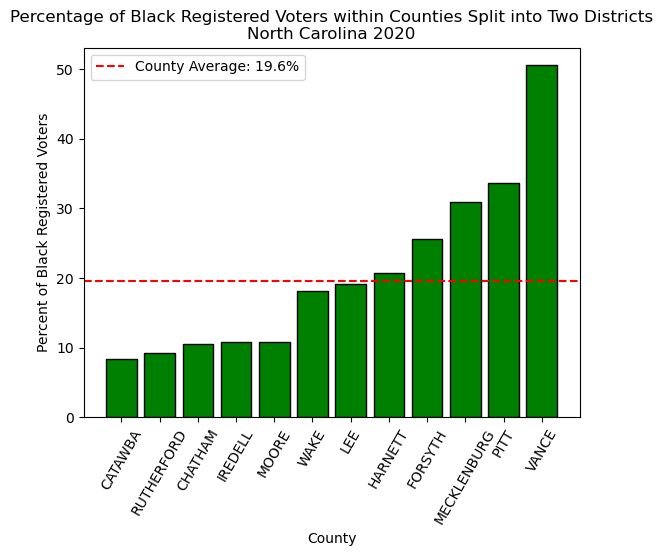

In [483]:
plt.bar(split_demo_2020.sort_values(by = 'black_percent')['County'], split_demo_2020.sort_values(by = 'black_percent')['black_percent']*100, color='green', edgecolor='black')
plt.axhline(y=county_2020['black_percent'].mean()*100, color='red', linestyle='--', linewidth=1.5, label='County Average: 19.6%')
plt.xticks(rotation=60)
plt.title('Percentage of Black Registered Voters within Counties Split into Two Districts\nNorth Carolina 2020')
plt.ylabel('Percent of Black Registered Voters')
plt.xlabel('County')
plt.legend(loc='upper left')
plt.savefig("2020_split_counties.png",bbox_inches='tight')